In [ ]:
import os
import cv2
import numpy as np
import shutil
from sklearn.model_selection import train_test_split


original_dataset_path = "/content/drive/MyDrive/Soybean Seeds"
preprocessed_dataset_path = "/content/drive/MyDrive/Preprocessed_Soybean_Seeds"


splits = ['train', 'val', 'test']
classes = os.listdir(original_dataset_path)
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(preprocessed_dataset_path, split, cls), exist_ok=True)


def preprocess_seed_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    denoised = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    ycrcb = cv2.cvtColor(denoised, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    equalized = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
    return equalized


for cls in classes:
    class_path = os.path.join(original_dataset_path, cls)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png'))]

    train_val_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)
    train_imgs, val_imgs = train_test_split(train_val_imgs, test_size=0.1, random_state=42)

    for split_name, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        for img_path in split_imgs:
            processed = preprocess_seed_image(img_path)
            if processed is not None:
                img_name = os.path.basename(img_path)
                save_path = os.path.join(preprocessed_dataset_path, split_name, cls, img_name)
                cv2.imwrite(save_path, processed)

preprocessed_dataset_path


'/content/drive/MyDrive/Preprocessed_Soybean_Seeds'

#cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_path = "/content/Preprocessed_Soybean_Seeds/train"
val_path = "/content/Preprocessed_Soybean_Seeds/val"
test_path = "/content/Preprocessed_Soybean_Seeds/test"


img_size = (224, 224)
batch_size = 32
num_classes = 5


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, validation_data=val_data, epochs=10)


model.save("cnn_seed_classifier.h5")


Found 3994 images belonging to 5 classes.
Found 446 images belonging to 5 classes.
Found 1113 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 441s 4s/step - accuracy: 0.3070 - loss: 1.6428 - val_accuracy: 0.4978 - val_loss: 1.0737
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 441s 4s/step - accuracy: 0.5878 - loss: 1.0580 - val_accuracy: 0.6435 - val_loss: 0.8759
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 430s 3s/step - accuracy: 0.6665 - loss: 0.8570 - val_accuracy: 0.7287 - val_loss: 0.7504
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.7597 - loss: 0.6405 - val_accuracy: 0.7354 - val_loss: 0.7127
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.7728 - loss: 0.6065 - val_accuracy: 0.6413 - val_loss: 0.8962
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.8166 - loss: 0.5411 - val_accuracy: 0.7332 - val_loss: 0.7175
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.8182 - loss: 0.4880 - val_accuracy: 0.7399 - val_loss: 0.7202
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.8535 - loss: 0.3805 - val_accuracy: 0.739

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_path = "/content/drive/MyDrive/Preprocessed_Soybean_Seeds/train"
val_path = "/content/drive/MyDrive/Preprocessed_Soybean_Seeds/val"
test_path = "/content/drive/MyDrive/Preprocessed_Soybean_Seeds/test"


img_size = (224, 224)
batch_size = 32
num_classes = 5


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 3994 images belonging to 5 classes.
Found 446 images belonging to 5 classes.
Found 1113 images belonging to 5 classes.


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import os


cnn_model = load_model("/content/cnn_seed_classifier.h5")


class_labels = list(train_data.class_indices.keys())


def preprocess_input_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return np.expand_dims(img, axis=0)


def predict_seed_class(img_path):
    processed_img = preprocess_input_image(img_path)
    prediction = model.predict(processed_img)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    return predicted_class, confidence


In [ ]:
predicted_class, confidence = predict_seed_class("/content/drive/MyDrive/Soybean Seeds/Skin-damaged soybeans/1023.jpg")
print(f"Predicted Class: {predicted_class} ({confidence*100:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Class: Broken soybeans (64.82% confidence)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


test_dir = '/content/drive/MyDrive/Preprocessed_Soybean_Seeds/test'


image_size = (224, 224)
batch_size = 32


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


cnn_model = load_model('cnn_seed_classifier.h5')


loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")
print(f"📉 Test Loss: {loss:.4f}")


Found 1113 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7905 - loss: 0.6479

✅ Test Accuracy: 0.7736
📉 Test Loss: 0.7515


In [ ]:
import numpy as np
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step


📊 CNN Classification Report:

                       precision    recall  f1-score   support

      Broken soybeans       0.59      0.76      0.66       203
    Immature soybeans       0.89      0.83      0.86       227
      Intact soybeans       0.84      0.83      0.84       245
Skin-damaged soybeans       0.76      0.76      0.76       226
     Spotted soybeans       0.82      0.68      0.74       212

             accuracy                           0.77      1113
            macro avg       0.78      0.77      0.77      1113
         weighted avg       0.79      0.77      0.78      1113



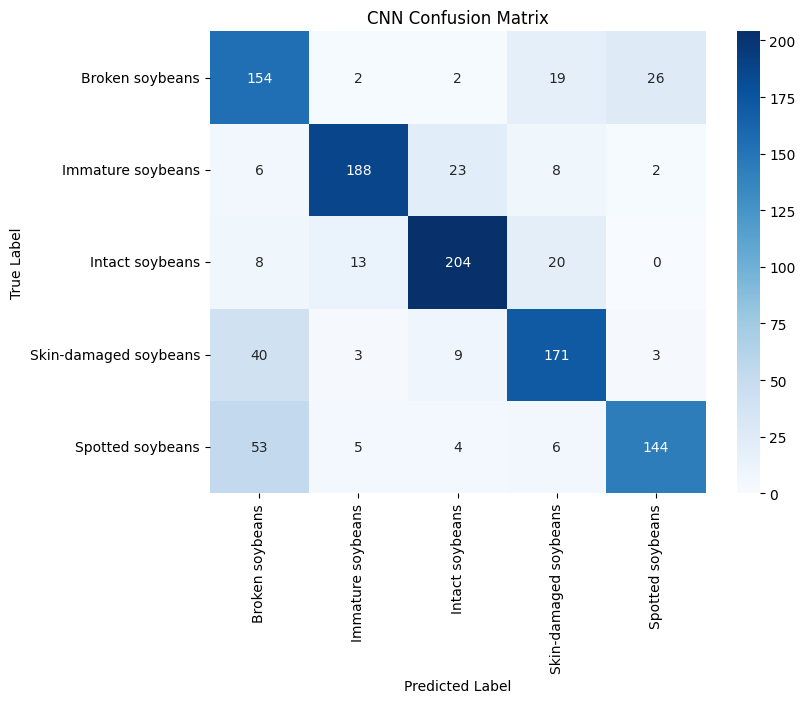

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


print("📊 CNN Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
files.download('/content/Preprocessed_Soybean_Seeds')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/cnn_seed_classifier.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#yolo


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n-cls.pt')


model.train(data='/content/drive/MyDrive/Preprocessed_Soybean_Seeds', epochs=20, imgsz=224)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 94.1MB/s]


Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Preprocessed_Soybean_Seeds, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/drive/MyDrive/Preprocessed_Soybean_Seeds/train... 3994 images, 0 corrupt: 100%|██████████| 3994/3994 [00:28<00:00, 137.99it/s]


train: New cache created: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/train.cache


val: Scanning /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... 446 images, 0 corrupt: 100%|██████████| 446/446 [00:02<00:00, 156.30it/s]


val: New cache created: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20         0G      1.708         16        224:   0%|          | 1/250 [00:01<05:20,  1.29s/it]

       1/20         0G      1.648         16        224:   1%|          | 2/250 [00:02<04:33,  1.10s/it]
100%|██████████| 755k/755k [00:00<00:00, 19.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all      0.852          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all      0.865          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all      0.868          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all      0.904          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all      0.913          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.31it/s]

                   all      0.908          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.36it/s]

                   all      0.917          1

      Epoch    GPU_mem       loss  Instances       Size



      10/20         0G     0.3005         10        224: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.31it/s]

                   all      0.917          1

      Epoch    GPU_mem       loss  Instances       Size



      11/20         0G     0.2608         10        224: 100%|██████████| 250/250 [04:05<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all      0.917          1

      Epoch    GPU_mem       loss  Instances       Size



      12/20         0G     0.2652         10        224: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all      0.924          1

      Epoch    GPU_mem       loss  Instances       Size



      13/20         0G     0.2568         10        224: 100%|██████████| 250/250 [04:01<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all      0.933          1

      Epoch    GPU_mem       loss  Instances       Size



      14/20         0G     0.2404         10        224: 100%|██████████| 250/250 [04:01<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]

                   all      0.937          1

      Epoch    GPU_mem       loss  Instances       Size



      15/20         0G     0.2212         10        224: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all      0.946          1

      Epoch    GPU_mem       loss  Instances       Size



      16/20         0G      0.212         10        224: 100%|██████████| 250/250 [04:01<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all      0.926          1

      Epoch    GPU_mem       loss  Instances       Size



      17/20         0G     0.1965         10        224: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all      0.942          1

      Epoch    GPU_mem       loss  Instances       Size



      18/20         0G     0.1823         10        224: 100%|██████████| 250/250 [04:03<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all      0.942          1

      Epoch    GPU_mem       loss  Instances       Size



      19/20         0G     0.1842         10        224: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all      0.942          1

      Epoch    GPU_mem       loss  Instances       Size



      20/20         0G     0.1666         10        224: 100%|██████████| 250/250 [04:04<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all      0.942          1

20 epochs completed in 1.414 hours.


Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/train... found 3994 images in 5 classes ✅ 
val: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... found 446 images in 5 classes ✅ 
test: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/test... found 1113 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]


                   all      0.948          1
Speed: 0.0ms preprocess, 11.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e0db98d0d0>
curves: []
curves_results: []
fitness: 0.9742152392864227
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9484304785728455, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9742152392864227}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0006485156905918274, 'inference': 11.870241360984723, 'loss': 5.2488786777880276e-05, 'postprocess': 0.00013673992228100177}
task: 'classify'
top1: 0.9484304785728455
top5: 1.0

In [ ]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/train... found 3994 images in 5 classes ✅ 
val: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... found 446 images in 5 classes ✅ 
test: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/test... found 1113 images in 5 classes ✅ 


val: Scanning /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... 446 images, 0 corrupt: 100%|██████████| 446/446 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:10<00:00,  2.65it/s]


                   all      0.948          1
Speed: 0.0ms preprocess, 12.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e0d342ded0>
curves: []
curves_results: []
fitness: 0.9742152392864227
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9484304785728455, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9742152392864227}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.0012828632237780171, 'inference': 12.728074325117339, 'loss': 0.0001235650228156349, 'postprocess': 0.0003410740046826663}
task: 'classify'
top1: 0.9484304785728455
top5: 1.0


In [ ]:
from google.colab import files


files.download('/content/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive



!cp /content/runs/classify/train/weights/best.pt /content/drive/MyDrive/yolo_seed_model.pt


In [ ]:
from ultralytics import YOLO


yolo_model = YOLO('/content/drive/MyDrive/yolo_seed_model.pt')


In [ ]:

results = yolo_model.predict('/content/drive/MyDrive/Soybean Seeds/Skin-damaged soybeans/1023.jpg')



image 1/1 /content/drive/MyDrive/Soybean Seeds/Skin-damaged soybeans/1023.jpg: 224x224 Skin-damaged soybeans 0.96, Spotted soybeans 0.02, Broken soybeans 0.01, Intact soybeans 0.00, Immature soybeans 0.00, 52.7ms
Speed: 9.8ms preprocess, 52.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:

predicted_class = results[0].names[results[0].probs.top1]
confidence = results[0].probs.top1conf

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")


Predicted Class: Skin-damaged soybeans
Confidence: 0.96


In [ ]:
from ultralytics import YOLO


model = YOLO('/content/best.pt')


metrics = model.val(data='/content/drive/MyDrive/Preprocessed_Soybean_Seeds', split='test')


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/train... found 3994 images in 5 classes ✅ 
val: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... found 446 images in 5 classes ✅ 
test: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/test... found 1113 images in 5 classes ✅ 


test: Scanning /content/drive/MyDrive/Preprocessed_Soybean_Seeds/test... 1113 images, 0 corrupt: 100%|██████████| 1113/1113 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 70/70 [00:28<00:00,  2.46it/s]


                   all      0.937          1
Speed: 0.0ms preprocess, 14.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3


In [ ]:
print(metrics)


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a41d1461b10>
curves: []
curves_results: []
fitness: 0.9685534536838531
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9371069073677063, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9685534536838531}
save_dir: PosixPath('runs/classify/val3')
speed: {'preprocess': 0.0013547996390335167, 'inference': 14.692318185085309, 'loss': 0.00012347798863332132, 'postprocess': 0.00030340161599456906}
task: 'classify'
top1: 0.9371069073677063
top5: 1.0


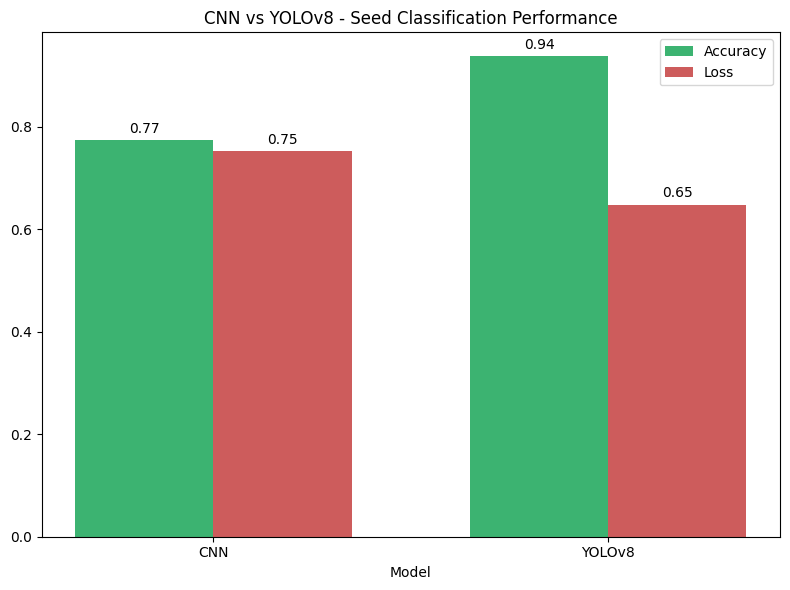

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


cnn_accuracy = 0.7736
cnn_loss = 0.7515

yolo_accuracy = 0.937
yolo_loss = 0.6479

models = ['CNN', 'YOLOv8']
accuracy = [cnn_accuracy, yolo_accuracy]
loss = [cnn_loss, yolo_loss]

x = np.arange(len(models))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
acc_bar = ax.bar(x - bar_width/2, accuracy, bar_width, label='Accuracy', color='mediumseagreen')
loss_bar = ax.bar(x + bar_width/2, loss, bar_width, label='Loss', color='indianred')

ax.set_xlabel('Model')
ax.set_title('CNN vs YOLOv8 - Seed Classification Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


for bar in acc_bar + loss_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
results = yolo_model.val()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
train: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/train... found 3994 images in 5 classes ✅ 
val: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... found 446 images in 5 classes ✅ 
test: /content/drive/MyDrive/Preprocessed_Soybean_Seeds/test... found 1113 images in 5 classes ✅ 


val: Scanning /content/drive/MyDrive/Preprocessed_Soybean_Seeds/val... 446 images, 0 corrupt: 100%|██████████| 446/446 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [01:31<00:00,  3.27s/it]


                   all      0.948          1
Speed: 0.0ms preprocess, 15.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val5


📋 YOLOv8 Classification Report:
                       precision    recall  f1-score   support

      Broken soybeans       0.95      1.00      0.97        77
    Immature soybeans       0.91      0.95      0.93        87
      Intact soybeans       0.99      0.92      0.96       105
Skin-damaged soybeans       0.98      0.99      0.98        90
     Spotted soybeans       1.00      0.98      0.99        87

             accuracy                           0.97       446
            macro avg       0.97      0.97      0.97       446
         weighted avg       0.97      0.97      0.97       446



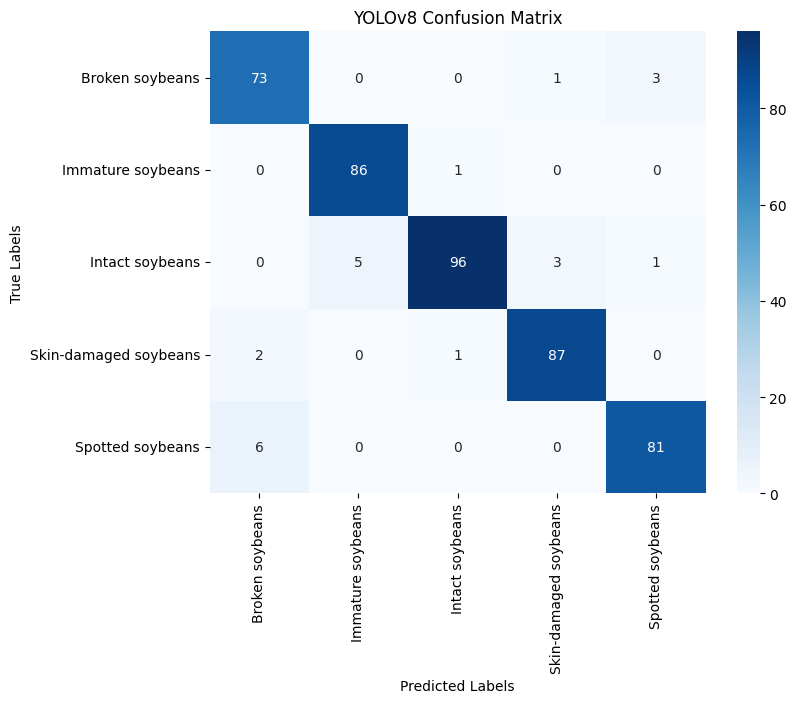

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


cfm = results.confusion_matrix.matrix.astype(int)


class_names = list(yolo_model.names.values())


y_true = np.repeat(np.arange(len(class_names)), cfm.sum(axis=1))
y_pred = np.concatenate([np.repeat(i, cfm[:, i].sum()) for i in range(len(class_names))])


print("📋 YOLOv8 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('YOLOv8 Confusion Matrix')
plt.show()


📋 CNN Classification Report:
                       precision    recall  f1-score   support

      Broken soybeans       0.95      1.00      0.97        77
    Immature soybeans       0.91      0.95      0.93        87
      Intact soybeans       0.99      0.92      0.96       105
Skin-damaged soybeans       0.98      0.99      0.98        90
     Spotted soybeans       1.00      0.98      0.99        87

             accuracy                           0.97       446
            macro avg       0.97      0.97      0.97       446
         weighted avg       0.97      0.97      0.97       446



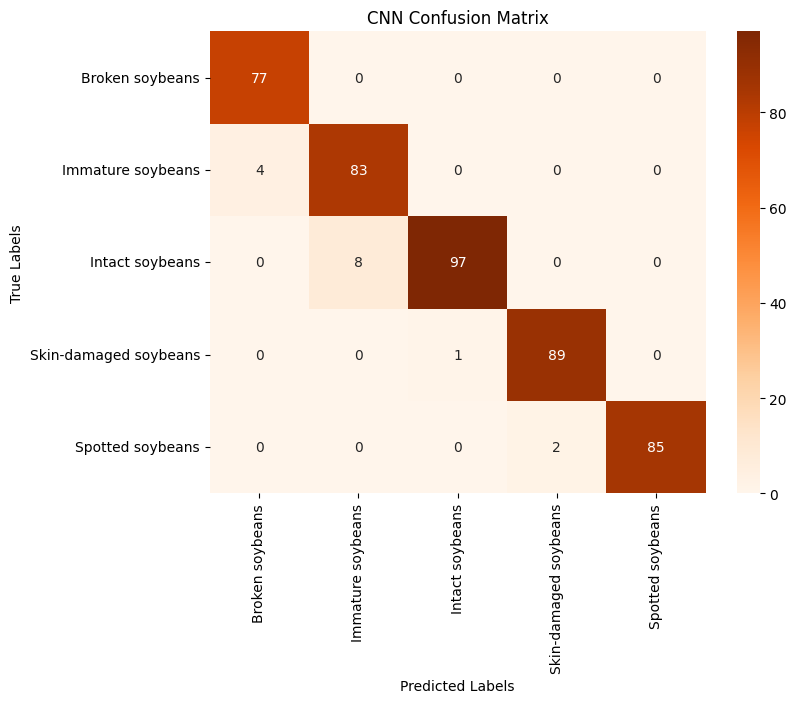

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("📋 CNN Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN Confusion Matrix')
plt.show()
